<a href="https://colab.research.google.com/github/Eliaum/formulaire/blob/main/Modele_InceptionV3_et_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# \# **Etape 1 : PREPARATION DE L'ENVIRONNEMENT DE TRAVAIL, TELECHARGEMENT ET EXPLORATION DU DATASET PLANTVILLAGE**




# **Préparation de l'environnement**



In [1]:
# Installer TensorFlow 2.x
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)  # Vérification de la version 2.x utilisée

# Vérification de la disponibilité du GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0
Found GPU at: /device:GPU:0


# **Vérification de l'utilisation optimale du GPU**

In [2]:
import tensorflow as tf

# Vérifie si TensorFlow peut accéder au GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Affiche des informations détaillées sur le GPU
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


# **Téléchargement et préparation des données**

In [5]:
from google.colab import drive
import os
import zipfile

# Vérification si Drive est déjà monté
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
    print("Drive monté.")
else:
    print("Drive est déjà monté.")

# Vérification de l'existence du dossier PlantVillage dans /content/drive/My Drive/Datasets
plant_village_path = '/content/drive/My Drive/Datasets/PlantVillage'
if os.path.exists(plant_village_path):
    print("Le dossier PlantVillage existe déjà.")

    # Lister les fichiers contenus dans le répertoire PlantVillage
    files = os.listdir(plant_village_path)
    print("Fichiers dans PlantVillage:")
    for file in files:
        print(file)
else:
    print("Le dossier PlantVillage n'existe pas.")

    # Chemin vers le fichier zip dans Google Drive
    zip_path = '/content/drive/My Drive/archive.zip'

    # Vérification de l'existence du fichier zip
    if os.path.exists(zip_path):
        print("Le fichier zip existe.")

        # Extraction des données
        extract_to = '/content/drive/My Drive/Datasets'
        os.makedirs(extract_to, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        # Lister les fichiers dans le répertoire
        extracted_files = os.listdir(extract_to)

        print("Extraction terminée.")

        print("Fichiers extraits :", extracted_files)

    else:
        print("Le fichier zip n'existe pas.")

Drive est déjà monté.
Le dossier PlantVillage existe déjà.
Fichiers dans PlantVillage:
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato__Tomato_mosaic_virus
Tomato_healthy


# **Script pour la suppression de sous-dossier redondant**

In [ ]:
import shutil
import os

# Chemin vers le sous-dossier redondant
redundant_folder_path = '/content/drive/My Drive/Datasets/PlantVillage/PlantVillage'

# Assurez-vous que le chemin est correct et que vous souhaitez vraiment supprimer ce dossier
if os.path.exists(redundant_folder_path):
    shutil.rmtree(redundant_folder_path)
    print(f"Dossier supprimé : {redundant_folder_path}")
else:
    print(f"Le dossier n'existe pas : {redundant_folder_path}")

Dossier supprimé : /content/drive/My Drive/Datasets/PlantVillage/PlantVillage


# **Examen des dossiers, sous dossiers et fichiers contenus dans le dataset PlantVillage**

Ce script nous permet d'afficher le répertoire du dataset sous la forme d'arborescence pour comprendre sa structure

In [6]:
import os

def list_directories(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        if level == 2:
            print(f'{subindent}{len(files)} files')

# Chemin vers le répertoire de données
data_dir = '/content/drive/My Drive/Datasets/PlantVillage'
list_directories(data_dir)

PlantVillage/
    Pepper__bell___Bacterial_spot/
    Pepper__bell___healthy/
    Potato___Early_blight/
    Potato___Late_blight/
    Potato___healthy/
    Tomato_Bacterial_spot/
    Tomato_Early_blight/
    Tomato_Late_blight/
    Tomato_Leaf_Mold/
    Tomato_Septoria_leaf_spot/
    Tomato_Spider_mites_Two_spotted_spider_mite/
    Tomato__Target_Spot/
    Tomato__Tomato_YellowLeaf__Curl_Virus/
    Tomato__Tomato_mosaic_virus/
    Tomato_healthy/


**Nous allons dès à présent décompter le nombre d'images présents dans ce jeu de données**

In [7]:
import os

def count_files(directory):
    for subdir, dirs, files in os.walk(directory):
        # Ignorer les dossiers de checkpoints de Jupyter
        if ".ipynb_checkpoints" not in subdir:
            file_count = sum(file.lower().endswith(('.png', '.jpg', '.jpeg')) for file in files)
            if file_count > 0:
                print(f'{subdir} has {file_count} image files')

# Comptage des fichiers dans chaque dossier
root_directory = '/content/drive/My Drive/Datasets/PlantVillage'
count_files(root_directory)

/content/drive/My Drive/Datasets/PlantVillage/Pepper__bell___Bacterial_spot has 997 image files
/content/drive/My Drive/Datasets/PlantVillage/Pepper__bell___healthy has 1478 image files
/content/drive/My Drive/Datasets/PlantVillage/Potato___Early_blight has 758 image files
/content/drive/My Drive/Datasets/PlantVillage/Tomato_healthy has 15 image files


# **Vérification de la qualité des images**

In [8]:
from PIL import Image
import os

def verify_images(directory):
    fichiers_corrompus = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = Image.open(os.path.join(subdir, file))
                    img.verify()  # Vérifie que l'image n'est pas corrompue
                except (IOError, SyntaxError) as e:
                    fichiers_corrompus.append(os.path.join(subdir, file))
    return fichiers_corrompus

# Vérification des images
fichiers_corrompus = verify_images('/content/drive/My Drive/Datasets/PlantVillage')
if fichiers_corrompus:
    print(f"Aucun {len(fichiers_corrompus)} fichiers corrompus trouvés.")
else:
    print("Aucun fichier corrompu trouvé.")

Aucun fichier corrompu trouvé.


# **Affichage de quelques images prises aléatoirement dans le dataset**

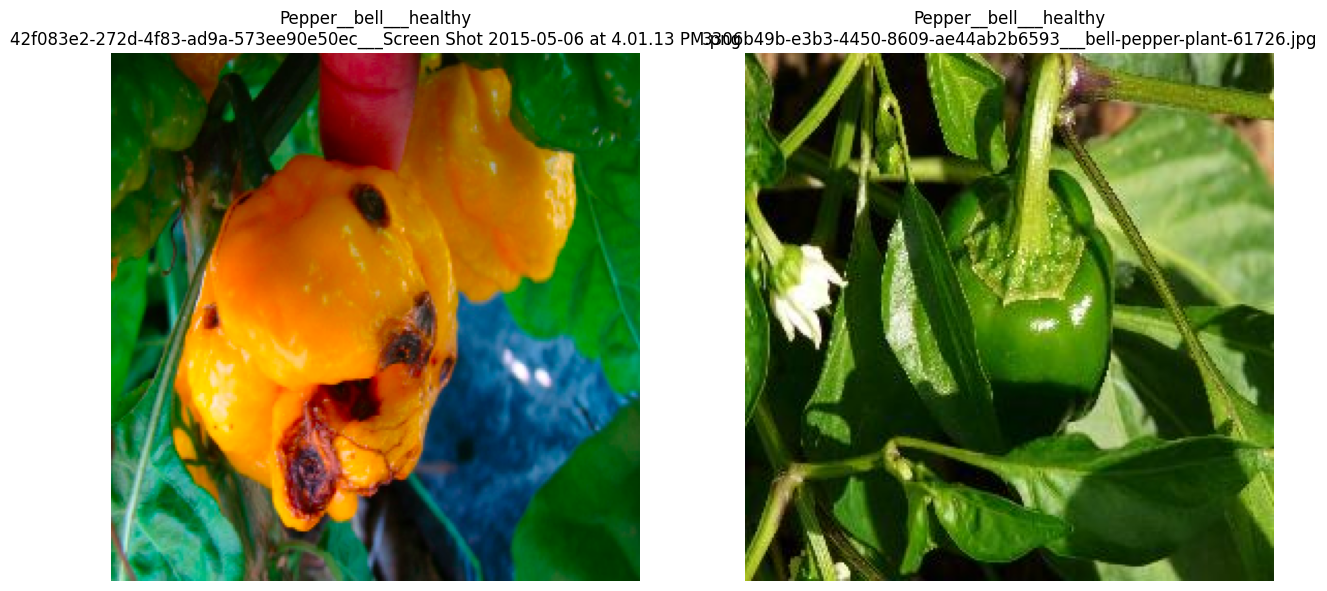

In [9]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_sample_images(directory, num_samples=5):
    all_images = []

    # Parcourir chaque sous-répertoire et collecter les images
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):  # Vérifie si c'est bien un dossier
            images = [os.path.join(subdir_path, file) for file in os.listdir(subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
            all_images.extend(images)

    # Vérifier si la liste des images est vide
    if not all_images:
        print("Aucune image trouvée dans le répertoire.")
        return

    # Sélectionner aléatoirement 'num_samples' images (ou moins si moins de 'num_samples' images sont disponibles)
    sample_images = random.sample(all_images, min(num_samples, len(all_images)))

    # Afficher les images sélectionnées
    plt.figure(figsize=(15, 10))  # Configurer la taille de la figure
    for i, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        plt.subplot(1, len(sample_images), i + 1)  # Créer un sous-plot pour chaque image
        plt.imshow(img)
        plt.title(f"{os.path.basename(os.path.dirname(img_path))}\n{os.path.basename(img_path)}")
        plt.axis('off')
    plt.show()

# Appel de la fonction pour afficher des images aléatoires
show_sample_images('/content/drive/My Drive/Datasets/PlantVillage', num_samples=5)



# \# **ETAPE 2 : CLASSIFICATION ET TECHNIQUES D'OPTIMISATION**


# **1: Importation des bibliothèques nécessaires**

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# **2: Prétraitement des données**

In [11]:
# # Création des dossiers train et val pour l'entraînement et la validation des données
os.makedirs('/content/drive/My Drive/Datasets/PlantVillage/train', exist_ok=True)
os.makedirs('/content/drive/My Drive/Datasets/PlantVillage/val', exist_ok=True)

# **Répartition des données pour l'entraînement et la validation**

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Chemins de base vers les répertoires de données
base_dir = '/content/drive/My Drive/Datasets/PlantVillage'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Pourcentage des données à utiliser pour la validation
validation_split = 0.2

# Liste des classes à traiter
classes = [
    'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Potato___Late_blight', 'Pepper__bell___Bacterial_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy',
    'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___Early_blight',
    'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato__Target_Spot',
    'Tomato_healthy', 'Tomato_Late_blight', 'Potato___healthy'
]

# Création des dossiers de classe dans train et val s'ils n'existent pas
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

# Répartition des fichiers
for cls in classes:
    class_dir = os.path.join(base_dir, cls)
    if not os.path.exists(class_dir):
        print(f"Le dossier {class_dir} n'existe pas.")
        continue

    # Obtenir la liste de tous les fichiers pour cette classe
    files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Classe {cls} : {len(files)} fichiers trouvés.")

    # Chemins complets des fichiers
    file_paths = [os.path.join(class_dir, f) for f in files]

    # Vérifier si la liste est vide ou contient très peu de fichiers
    if len(file_paths) < 5:
        print(f"Nombre insuffisant de fichiers dans {cls}. Tous ajoutés à l'ensemble d'entraînement.")
        for f in file_paths:
            dest = os.path.join(train_dir, cls, os.path.basename(f))
            shutil.move(f, dest)
            print(f"Déplacé {f} vers {dest}")
        continue

    # Diviser en train et validation
    train_files, val_files = train_test_split(file_paths, test_size=validation_split, random_state=42)

    # Déplacer les fichiers dans les répertoires respectifs
    for f in train_files:
        dest = os.path.join(train_dir, cls, os.path.basename(f))
        shutil.move(f, dest)
        print(f"Déplacé {f} vers {dest}")

    for f in val_files:
        dest = os.path.join(val_dir, cls, os.path.basename(f))
        shutil.move(f, dest)
        print(f"Déplacé {f} vers {dest}")

print("Répartition terminée !")

Classe Tomato__Tomato_mosaic_virus : 0 fichiers trouvés.
Nombre insuffisant de fichiers dans Tomato__Tomato_mosaic_virus. Tous ajoutés à l'ensemble d'entraînement.
Classe Tomato__Tomato_YellowLeaf__Curl_Virus : 0 fichiers trouvés.
Nombre insuffisant de fichiers dans Tomato__Tomato_YellowLeaf__Curl_Virus. Tous ajoutés à l'ensemble d'entraînement.
Classe Potato___Late_blight : 0 fichiers trouvés.
Nombre insuffisant de fichiers dans Potato___Late_blight. Tous ajoutés à l'ensemble d'entraînement.
Classe Pepper__bell___Bacterial_spot : 997 fichiers trouvés.
Déplacé /content/drive/My Drive/Datasets/PlantVillage/Pepper__bell___Bacterial_spot/bc76d04a-056a-4fa4-a3de-2d848101631a___JR_B.Spot 9089.JPG vers /content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/bc76d04a-056a-4fa4-a3de-2d848101631a___JR_B.Spot 9089.JPG
Déplacé /content/drive/My Drive/Datasets/PlantVillage/Pepper__bell___Bacterial_spot/45cfd1ee-052e-43ef-93ff-ae392eedd726___NREC_B.Spot 9084.JPG vers /cont

# **Vérification de l'extension des fichiers et intégrité**

In [13]:
import os
from PIL import Image

def verify_images(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Vérifie que l'image n'est pas corrompue
            except (IOError, SyntaxError) as e:
                print('Bad file:', filepath)  # Affiche les fichiers corrompus ou non lisibles

verify_images('/content/drive/My Drive/Datasets/PlantVillage')

# **Suppression des fichiers corrompus**

In [ ]:
import os
from PIL import Image

def verify_and_clean_images(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Vérification que l'image n'est pas corrompue
            except (IOError, SyntaxError) as e:
                print('Bad file:', filepath)  # Affichage des fichiers corrompus ou non lisibles
                os.remove(filepath)  # Suppression du fichier corrompu
                print('Removed:', filepath)  # Confirmation de la suppression du fichier

verify_and_clean_images('/content/drive/My Drive/Datasets/PlantVillage')

Bad file: /content/drive/My Drive/Datasets/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c
Removed: /content/drive/My Drive/Datasets/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c


# **Vérification du Contenu des Répertoires**

In [14]:
import os

def count_files(directory):
    total_images = 0  # Initialiser le compteur global

    for subdir, dirs, files in os.walk(directory):
        # Ignorer les dossiers de checkpoints de Jupyter
        if ".ipynb_checkpoints" not in subdir:
            file_count = sum(file.lower().endswith(('.png', '.jpg', '.jpeg')) for file in files)
            if file_count > 0:
                print(f'{subdir} has {file_count} image files')
            total_images += file_count  # Ajouter au compteur global

    print(f'Total number of image files: {total_images}')  # Afficher le nombre total d'images

# Comptage des fichiers dans chaque dossier
print("Ensemble d'entraînement :")
count_files('/content/drive/My Drive/Datasets/PlantVillage/train')

print("\nEnsemble de validation :")
count_files('/content/drive/My Drive/Datasets/PlantVillage/val')

Ensemble d'entraînement :
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot has 797 image files
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___healthy has 1182 image files
/content/drive/My Drive/Datasets/PlantVillage/train/Potato___Early_blight has 606 image files
/content/drive/My Drive/Datasets/PlantVillage/train/Tomato_healthy has 12 image files
Total number of image files: 2597

Ensemble de validation :
/content/drive/My Drive/Datasets/PlantVillage/val/Pepper__bell___Bacterial_spot has 200 image files
/content/drive/My Drive/Datasets/PlantVillage/val/Pepper__bell___healthy has 296 image files
/content/drive/My Drive/Datasets/PlantVillage/val/Potato___Early_blight has 152 image files
/content/drive/My Drive/Datasets/PlantVillage/val/Tomato_healthy has 3 image files
Total number of image files: 651


# **Augmentation des données**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception_v3
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet_v2

# Création de générateurs d'images avec augmentation pour Inception V3 et MobileNet V2
def create_generators(base_dir, batch_size=32):
    datagen = ImageDataGenerator(
        preprocessing_function=preprocess_inception_v3,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Utilisez un traitement différent si nécessaire pour MobileNet V2
    # datagen.preprocessing_function = preprocess_mobilenet_v2

    return train_generator

train_gen = create_generators('/content/drive/My Drive/Datasets/PlantVillage')

Found 2597 images belonging to 15 classes.


## **Vérification du chemin des images trouvées :**

In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception_v3
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet_v2

def create_generators(base_dir, batch_size=32):
    datagen = ImageDataGenerator(
        preprocessing_function=preprocess_inception_v3,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Affiche les chemins des images trouvées
    for i in range(len(train_generator.filepaths)):
        print(train_generator.filepaths[i])

    return train_generator

train_gen = create_generators('/content/drive/My Drive/Datasets/PlantVillage')

Found 2597 images belonging to 15 classes.
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG
/content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot/01940b6d-7dea-4889-a7b8-a35f4e9bb

# **Utilisation de modèles pré-entraînés pour le transfert d'apprentissage**

In [17]:
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Charger les modèles pré-entraînés sans la couche de classification finale
base_model_inception = InceptionV3(weights='imagenet', include_top=False)
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False)

# Créer les nouveaux modèles avec nos propres couches de classification
model_inception = create_model(base_model_inception, 10)
model_mobilenet = create_model(base_model_mobilenet, 10)

# Compiler les modèles
model_inception.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé des modèles
model_inception.summary()
model_mobilenet.summary()

87910968/87910968 [==============================] - 0s 0us/step


9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (N

# \# **ETAPE 3 : ENTRAÎNEMENT DES MODELES**

# **Préparation des données et entraînement des modèles**

In [18]:
import os

# Chemin vers les données d'entraînement et de validation
train_data_dir = '/content/drive/My Drive/Datasets/PlantVillage/train'
valid_data_dir = '/content/drive/My Drive/Datasets/PlantVillage/val'

# Vérifiez si les répertoires existent
if not os.path.exists(train_data_dir):
    raise FileNotFoundError(f"Le répertoire spécifié pour les données d'entraînement n'existe pas: {train_data_dir}")
if not os.path.exists(valid_data_dir):
    raise FileNotFoundError(f"Le répertoire spécifié pour les données de validation n'existe pas: {valid_data_dir}")

# Vérifiez si les répertoires contiennent des images
def check_directory_contents(directory):
    for root, dirs, files in os.walk(directory):
        if not files:
            print(f"Aucun fichier trouvé dans {root}")
        else:
            print(f"{len(files)} fichiers trouvés dans {root}")

print("Contenu du répertoire d'entraînement :")
check_directory_contents(train_data_dir)

print("Contenu du répertoire de validation :")
check_directory_contents(valid_data_dir)

Contenu du répertoire d'entraînement :
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Tomato__Tomato_mosaic_virus
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Tomato__Tomato_YellowLeaf__Curl_Virus
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Potato___Late_blight
797 fichiers trouvés dans /content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___Bacterial_spot
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Tomato_Spider_mites_Two_spotted_spider_mite
1182 fichiers trouvés dans /content/drive/My Drive/Datasets/PlantVillage/train/Pepper__bell___healthy
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Tomato_Septoria_leaf_spot
Aucun fichier trouvé dans /content/drive/My Drive/Datasets/PlantVillage/train/Tomato_Early_blight
606 fichiers trouvés dans /c

# **Entraînement des modèles en utilisant InceptionV3 et MobileNetV2**

Nouveau modèle InceptionV3 créé.
Nouveau modèle MobileNetV2 créé.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


81/81 [==============================] - 92s 734ms/step - loss: 0.4006 - accuracy: 0.8865 - val_loss: 10473.1035 - val_accuracy: 0.4609 - lr: 0.0010
Epoch 2/20
81/81 [==============================] - 50s 619ms/step - loss: 0.1779 - accuracy: 0.9505 - val_loss: 6.4980 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 3/20
81/81 [==============================] - 49s 609ms/step - loss: 0.1212 - accuracy: 0.9657 - val_loss: 0.1808 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 4/20
81/81 [==============================] - 51s 624ms/step - loss: 0.0604 - accuracy: 0.9801 - val_loss: 0.0644 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 5/20
81/81 [==============================] - 52s 632ms/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 4.7893 - val_accuracy: 0.5984 - lr: 0.0010
Epoch 6/20
81/81 [==============================] - 51s 625ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.4484 - val_accuracy: 0.9109 - lr: 0.0010
Epoch 7/20
81/81 [==============================] - 50s 613ms/step - lo

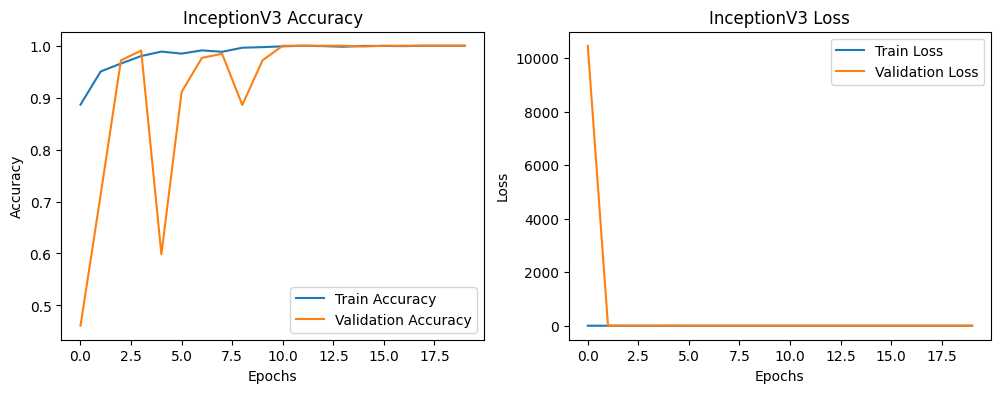

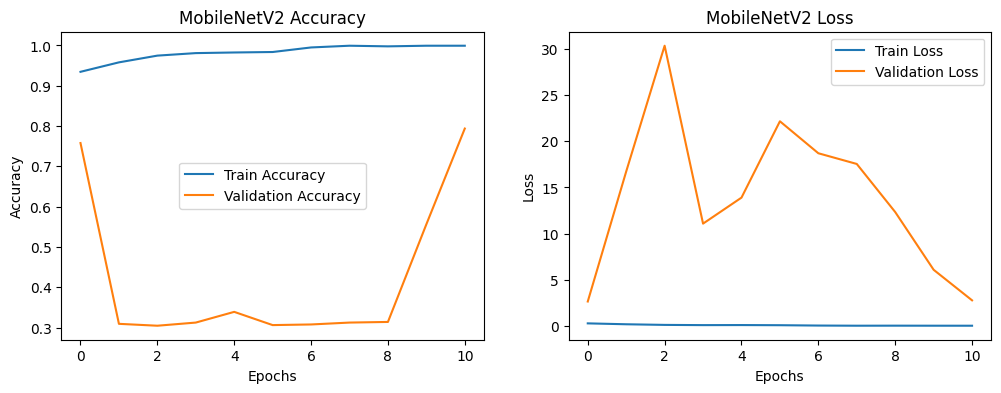

In [19]:
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import matplotlib.pyplot as plt

def create_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Ajouter du Dropout
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Charger les modèles pré-entraînés sans la couche de classification finale
base_model_inception = InceptionV3(weights='imagenet', include_top=False)
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False)

# Nombre de classes (15 d'après vos générateurs de données)
num_classes = 15

# Vérifier l'existence des sauvegardes
if os.path.exists('/content/drive/My Drive/Datasets/PlantVillage/model_inception.h5'):
    model_inception = load_model('/content/drive/My Drive/Datasets/PlantVillage/model_inception.h5')
    print("Modèle InceptionV3 chargé depuis la sauvegarde.")
else:
    model_inception = create_model(base_model_inception, num_classes)
    print("Nouveau modèle InceptionV3 créé.")

mobilenet_latest_epoch = None
for epoch in range(20, 0, -1):
    if os.path.exists(f'/content/drive/My Drive/Datasets/PlantVillage/model_mobilenet_epoch_{epoch:02d}.h5'):
        model_mobilenet = load_model(f'/content/drive/My Drive/Datasets/PlantVillage/model_mobilenet_epoch_{epoch:02d}.h5')
        mobilenet_latest_epoch = epoch
        print(f"Modèle MobileNetV2 chargé depuis la sauvegarde de l'époque {epoch}.")
        break

if mobilenet_latest_epoch is None:
    model_mobilenet = create_model(base_model_mobilenet, num_classes)
    mobilenet_latest_epoch = 0
    print("Nouveau modèle MobileNetV2 créé.")

# Compiler les modèles
model_inception.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé des modèles
model_inception.summary()
model_mobilenet.summary()

# Chemin vers les données d'entraînement et de validation
train_data_dir = '/content/drive/My Drive/Datasets/PlantVillage/train'
valid_data_dir = '/content/drive/My Drive/Datasets/PlantVillage/val'

# Vérifiez si les répertoires existent
if not os.path.exists(train_data_dir):
    raise FileNotFoundError(f"Le répertoire spécifié pour les données d'entraînement n'existe pas: {train_data_dir}")
if not os.path.exists(valid_data_dir):
    raise FileNotFoundError(f"Le répertoire spécifié pour les données de validation n'existe pas: {valid_data_dir}")

# Création des générateurs de données
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des images
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des images

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Vérification des steps_per_epoch et des validation_steps
steps_per_epoch_train = train_generator.samples // train_generator.batch_size
steps_per_epoch_val = validation_generator.samples // validation_generator.batch_size

if steps_per_epoch_train == 0 or steps_per_epoch_val == 0:
    raise ValueError("Le nombre de steps_per_epoch pour l'entraînement ou la validation est 0. Vérifiez vos données et assurez-vous qu'elles sont correctement chargées.")

# Configuration des callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint_inception = ModelCheckpoint('/content/drive/My Drive/Datasets/PlantVillage/model_inception_epoch_{epoch:02d}.h5', save_best_only=False, save_freq='epoch')
checkpoint_mobilenet = ModelCheckpoint('/content/drive/My Drive/Datasets/PlantVillage/model_mobilenet_epoch_{epoch:02d}.h5', save_best_only=False, save_freq='epoch')

# Entraîner les modèles
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_val,
    epochs=20,
    callbacks=[early_stopping, reduce_lr, checkpoint_inception]
)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_val,
    epochs=20,
    callbacks=[early_stopping, reduce_lr, checkpoint_mobilenet]
)

# Plot the training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plotting the history for both models
plot_history(history_inception, 'InceptionV3')
plot_history(history_mobilenet, 'MobileNetV2')

# Sauvegarder les modèles entraînés
model_inception.save('model_inception.h5')
model_mobilenet.save('model_mobilenet.h5')

# **Evaluation du modèle entraîné**

In [ ]:
# Évaluer le modèle sur l'ensemble de validation
val_loss, val_accuracy = model_inception.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# **Evaluation du modèle entraîné sur un Ensemble de Test Indépendant**

In [ ]:
# Chemin vers les données de test
test_data_dir = '/content/drive/My Drive/Datasets/PlantVillage/test'

# Création du générateur de données de test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Évaluer le modèle sur l'ensemble de test
test_loss_inception, test_accuracy_inception = model_inception.evaluate(test_generator)
test_loss_mobilenet, test_accuracy_mobilenet = model_mobilenet.evaluate(test_generator)

print(f'Test Loss InceptionV3: {test_loss_inception}')
print(f'Test Accuracy InceptionV3: {test_accuracy_inception}')
print(f'Test Loss MobileNetV2: {test_loss_mobilenet}')
print(f'Test Accuracy MobileNetV2: {test_accuracy_mobilenet}')